In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

In [19]:
# Downloading stock data using yfinance
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

In [20]:
data = yf.download(stock, start, end)
data.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [21]:
# Data preprocessing for KNN
data.dropna(inplace=True)
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])

In [22]:
scaler_knn = MinMaxScaler(feature_range=(0, 1))
data_train_scale = scaler_knn.fit_transform(data_train)

In [23]:
X_knn, y_knn = [], []


In [24]:
for i in range(100, data_train_scale.shape[0]):
    X_knn.append(data_train_scale[i-100:i])
    y_knn.append(data_train_scale[i, 0])

In [25]:
X_knn, y_knn = np.array(X_knn), np.array(y_knn)

In [26]:
# Splitting the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

In [27]:
# Reshape X_train_knn and X_test_knn to 2D
X_train_knn_2d = X_train_knn.reshape(X_train_knn.shape[0], -1)
X_test_knn_2d = X_test_knn.reshape(X_test_knn.shape[0], -1)

In [28]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_knn_2d, y_train_knn)

KNeighborsRegressor()

In [29]:
y_pred_knn = knn_model.predict(X_test_knn_2d)

In [30]:
# Scaling back the predictions and actual values
y_pred_knn = y_pred_knn * scaler_knn.scale_
y_test_knn = y_test_knn * scaler_knn.scale_

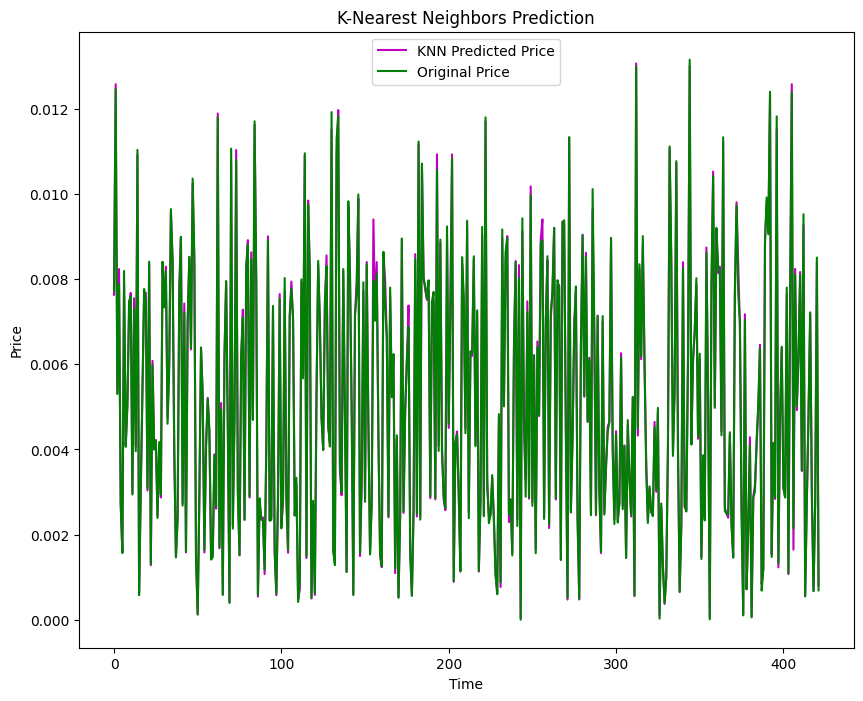

In [31]:
# Plotting the results
plt.figure(figsize=(10, 8))
plt.plot(y_pred_knn, 'm', label='KNN Predicted Price')
plt.plot(y_test_knn, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('K-Nearest Neighbors Prediction')
plt.show()

In [32]:
# Evaluating the model
mse_knn = mean_squared_error(y_test_knn, y_pred_knn)
print(f'Mean Squared Error (KNN): {mse_knn}')
r2 = r2_score(y_test_knn,y_pred_knn)
print(f'r2 error: {r2}')

Mean Squared Error (KNN): 2.2500034081820174e-08
r2 error: 0.9977302056926638
